<h1>MILESTONE-4</h1>

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">

<h2 align="left"><font color=skyblue>Anomaly Detection</font></h2>


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Data set</font></h2>


In [56]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [57]:
irrelevant_columns=['Entity Type of the Provider',
                    'Street Address 1 of the Provider',
                    'Street Address 2 of the Provider',
                    'Zip Code of the Provider',
                    'Medicare Participation Indicator',
                    'Place of Service',
                    'HCPCS Code',
                    'HCPCS Description',
                    'HCPCS Drug Indicator',
                    'Country Code of the Provider']

data=data.drop(columns=irrelevant_columns)


In [58]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Data Preprocessing</font></h2>


In [59]:
# Merging the name columns into a single column 
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')
data['Full Name'] = data['Full Name'].str.strip()

data = data.drop(columns=['Last Name/Organization Name of the Provider', 
                          'First Name of the Provider', 
                          'Middle Initial of the Provider'])

full_name_column = data.pop('Full Name')

data.insert(1, 'Full Name', full_name_column)


data.head()


,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


In [60]:
# Uniform format of credentials
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Converting Object to Numeric Type
</font></h2>


In [61]:
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               92791 non-null   object 
 4   Gender of the Provider                                    95746 non-null   object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue> Missing values</font></h2>

In [62]:
# missing values
print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                          2653
Number of Medicare Beneficiaries                             405
Number of Distinct Medicare Beneficiary/Per Day Services    1500
Average Medicare Allowed Amount                              745
Average Submitted Charge Amount                             6723
Average Medicare Payment Amount                              466
Average Medicare Standardized Amount                         470
dtype: int64


In [63]:
# Imputation of numeric missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64


In [64]:
categorical_columns = ['Credentials of the Provider',
                   'Gender of the Provider',
                   'City of the Provider',
                  'State Code of the Provider']

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print(data.isnull().sum())

index                                                       0
Full Name                                                   0
National Provider Identifier                                0
Credentials of the Provider                                 0
Gender of the Provider                                      0
City of the Provider                                        0
State Code of the Provider                                  0
Provider Type                                               0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64


C:\Users\bjbis\AppData\Local\Temp\ipykernel_1580\2946405470.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Check for Duplicates</font></h2>

In [65]:
# Check for duplicates
print(data.duplicated().sum())
data.head()

0


,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [66]:
def frequency_encode(df, columns):
    for column in columns:
        freq_encoding = df[column].value_counts() / len(df)
        new_column_name = column + '_Freq'
        df.insert(df.columns.get_loc(column) + 1, new_column_name, df[column].map(freq_encoding))
    return df

columns_to_encode=['Credentials of the Provider',
                   'Gender of the Provider',
                   'Provider Type',
                  'State Code of the Provider']

data = frequency_encode(data, columns_to_encode)

df=data

data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.73827,F,0.29105,SAINT LOUIS,MO,0.01997,Internal Medicine,0.11366,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,0.73827,F,0.29105,FAYETTEVILLE,NC,0.03725,Obstetrics & Gynecology,0.01028,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,0.01915,M,0.70895,NORTH HAVEN,CT,0.01403,Podiatry,0.02027,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,0.73827,M,0.70895,KANSAS CITY,MO,0.01997,Internal Medicine,0.11366,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,0.06176,M,0.70895,JUPITER,FL,0.07263,Internal Medicine,0.11366,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [67]:
from sklearn.preprocessing import StandardScaler

data_copy=data.copy()

standardization_columns=['Number of Services',
                         'Number of Medicare Beneficiaries',
                         'Number of Distinct Medicare Beneficiary/Per Day Services',
                         'Average Medicare Allowed Amount',
                         'Average Submitted Charge Amount',
                         'Average Medicare Payment Amount',
                         'Average Medicare Standardized Amount',
                         'Credentials of the Provider_Freq',
                         'Gender of the Provider_Freq',
                         'State Code of the Provider_Freq' ]

# Standardization
standard_scaler = StandardScaler()
data[standardization_columns] = standard_scaler.fit_transform(data[standardization_columns])



print("Standardized DataFrame:")

data.head()


Standardized DataFrame:


,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.594983,F,-1.560716,SAINT LOUIS,MO,-0.737342,Internal Medicine,0.11366,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321
1,3354385,WENDY P JONES,1346202256,MD,0.594983,F,-1.560716,FAYETTEVILLE,NC,-0.004973,Obstetrics & Gynecology,0.01028,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789
2,3001884,RICHARD W DUROCHER,1306820956,DPM,-1.684316,M,0.640731,NORTH HAVEN,CT,-0.989093,Podiatry,0.02027,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209
3,7594822,JASPER FULLARD,1770523540,MD,0.594983,M,0.640731,KANSAS CITY,MO,-0.737342,Internal Medicine,0.11366,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804
4,746159,ANTHONY E PERROTTI,1073627758,DO,-1.549260,M,0.640731,JUPITER,FL,1.494517,Internal Medicine,0.11366,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
<h2 align="left"><font color=green>Final Dataset</font></h2>

In [68]:
anomaly_detection_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Credentials of the Provider_Freq',
    'Gender of the Provider_Freq',
    'State Code of the Provider_Freq', 
    'Provider Type_Freq'
]

X = data[anomaly_detection_columns]

X


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Credentials of the Provider_Freq,Gender of the Provider_Freq,State Code of the Provider_Freq,Provider Type_Freq
0,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321,0.594983,-1.560716,-0.737342,0.11366
1,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789,0.594983,-1.560716,-0.004973,0.01028
2,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209,-1.684316,0.640731,-0.989093,0.02027
3,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804,0.594983,0.640731,-0.737342,0.11366
4,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510,-1.549260,0.640731,1.494517,0.11366
...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.544917,-0.484087,-0.531272,-0.020219,0.126753,-0.088807,-0.078095,-1.709831,-1.560716,0.142517,0.02780
99996,0.239576,0.371423,0.281380,-0.254193,-0.252286,-0.426514,-0.354403,-1.729577,-1.560716,-1.140399,0.05713
99997,-0.605783,-0.572588,-0.594322,-0.674428,-0.439269,-0.601485,-0.600151,0.594983,0.640731,-0.737342,0.04602
99998,-0.599020,-0.562754,-0.587316,-0.552503,-0.680654,-0.427351,-0.482868,0.594983,-1.560716,1.112228,0.11366


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">

<h2 align="left"><font color=green>Auto Encoderse</font></h2>


This code snippet demonstrates the construction and training of an autoencoder using the Iris dataset. Initially, the dataset is loaded and then standardized to ensure uniformity across features. The autoencoder model architecture is defined using Keras, with an input layer shaped to match the number of features in the dataset. It comprises several dense layers for encoding and decoding, gradually reducing the input dimensionality to an encoded representation and then reconstructing it back to its original form. The model is compiled with the Adam optimizer and mean squared error loss function, suitable for reconstruction tasks. During training, the autoencoder learns to minimize reconstruction error over 50 epochs using batches of 256 samples, with 20% of the data reserved for validation. The model's summary provides insight into its structure, and training progress is monitored to ensure effective learning and reconstruction performance.


In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Load the dataset
data = load_iris()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the dimensions
input_dim = X_scaled.shape[1]
encoding_dim = 11  # Number of nodes in the encoded layer

# Define the Autoencoder Model
input_layer = Input(shape=(input_dim,))

# Encoding layers
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Assuming X is your input data and already standardized
X_scaled = X

# Define the dimensions
input_dim = X_scaled.shape[1]
encoding_dim = 11  # Dimension of the encoded representation

# Define the Autoencoder Model
input_layer = Input(shape=(input_dim,))

# Encoding layers
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Create the Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the Autoencoder
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Display the model summary
autoencoder.summary()

# Training the Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, shuffle=True, validation_split=0.2,verbose=1)


# plot the model
import tensorflow as tf
tf.keras.utils.plot_model(autoencoder, to_file='model.png',show_shapes=True)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 11)             │           187 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,223 (24.31 KB)

 Trainable params: 6,223 (24.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 11.6308 - val_loss: 17.7327
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.1096 - val_loss: 17.5838
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.0301 - val_loss: 17.3782
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.7604 - val_loss: 17.0647
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.0030 - val_loss: 16.6271
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.0971 - val_loss: 16.0647
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.1546 - val_loss: 15.4594
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4899 - val_loss: 14.9391
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5325 - val_loss: 14.5970
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9134 - val_loss: 14.4300
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0654 - val_loss: 14.3650
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss

In [91]:
# Reconstruct the Data and Calculate Reconstruction Error
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# Detect Anomalies Based on Reconstruction Error
threshold = np.percentile(reconstruction_errors, 99)  # Set threshold at 99 percentile
data['Autoencoder_Anomaly'] = (reconstruction_errors > threshold).astype(int)

# Identify anomalies
anomalies = reconstruction_errors > threshold
num_anomalies = np.sum(anomalies)

print(f'Number of anomalies: {num_anomalies}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Number of anomalies: 2


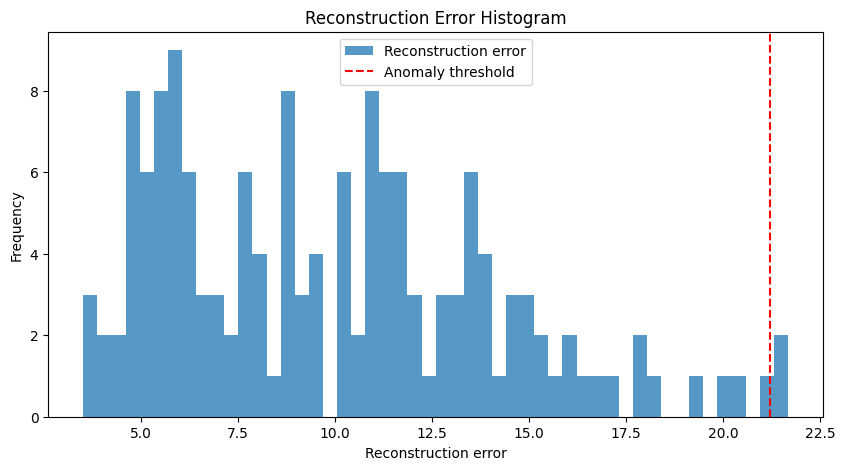

In [92]:
# Plot the Reconstruction Error
plt.figure(figsize=(10, 5))
plt.hist(reconstruction_errors, bins=50, alpha=0.75, label='Reconstruction error')
plt.axvline(x=threshold, color='r', linestyle='--', label='Anomaly threshold')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Histogram')
plt.legend()
plt.show()


Number of anomalies: 2
Number of normal instances: 148


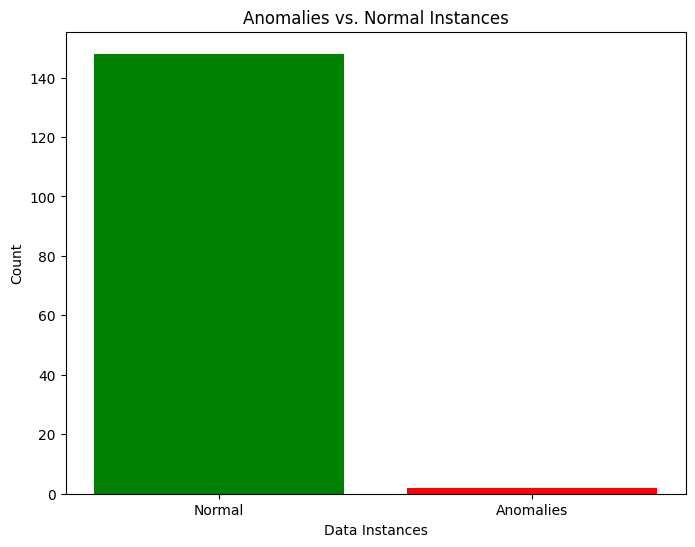

In [93]:
# Count anomalies and normal instances
num_anomalies = np.sum(anomalies)
num_normal = len(X_scaled) - num_anomalies

print(f'Number of anomalies: {num_anomalies}')
print(f'Number of normal instances: {num_normal}')

# Plot Bar Graph for Anomalies vs. Normal Instances
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Anomalies'], [num_normal, num_anomalies], color=['green', 'red'])
plt.xlabel('Data Instances')
plt.ylabel('Count')
plt.title('Anomalies vs. Normal Instances')
plt.show()


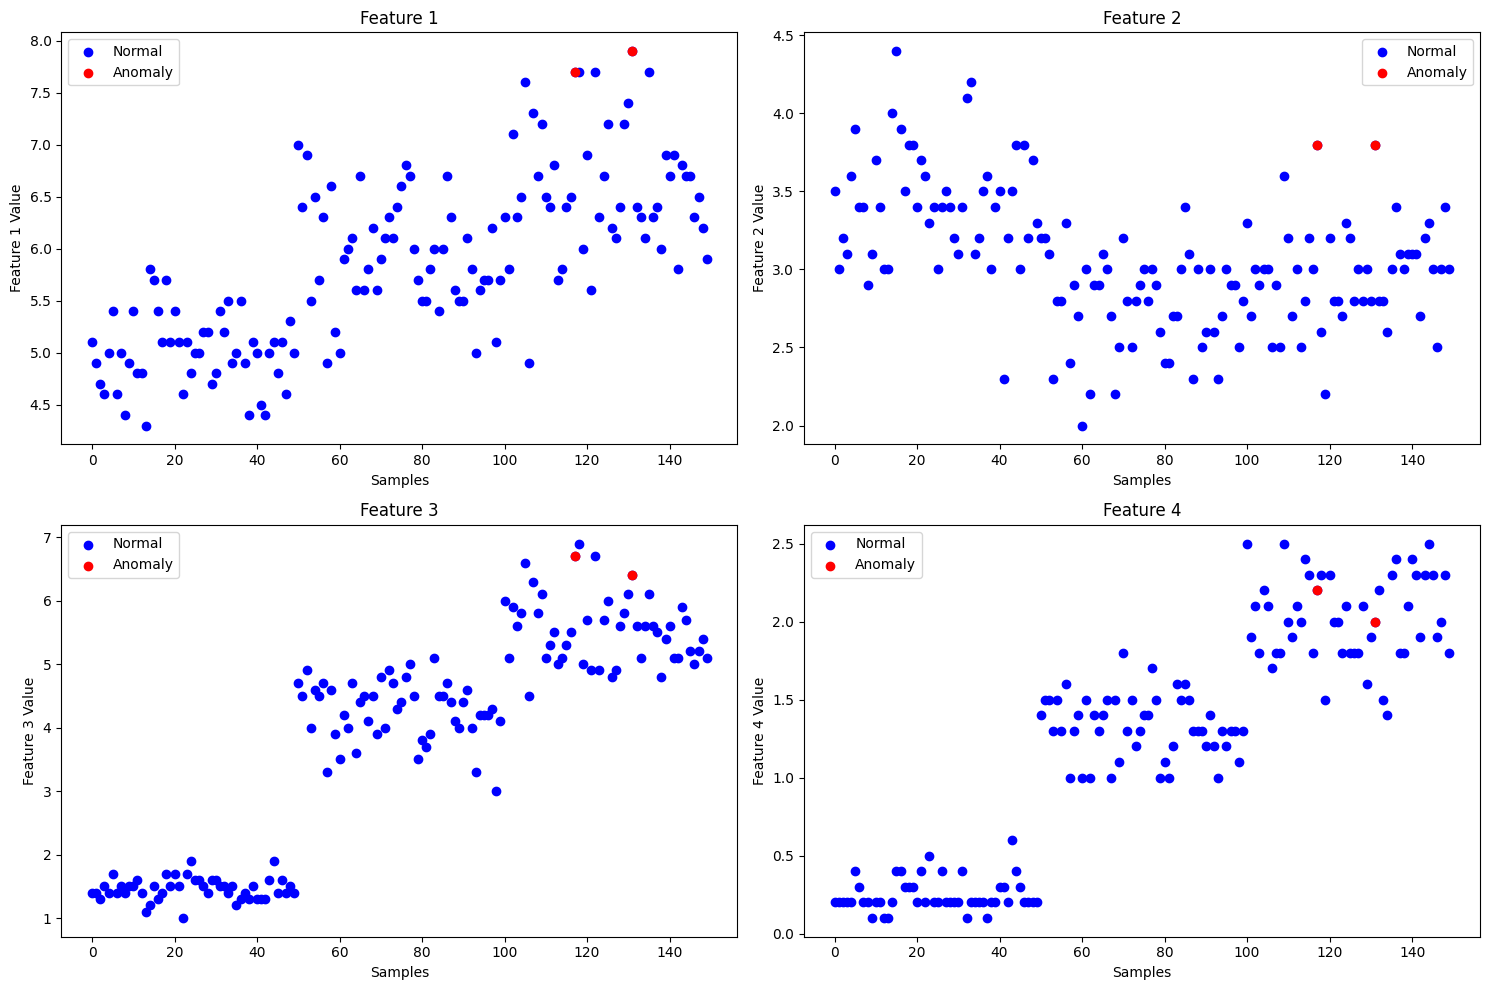

In [94]:
# Scatter Plots of Anomalies in Each Column
plt.figure(figsize=(15, 10))

for i in range(input_dim):
    plt.subplot(2, 2, i+1)
    plt.scatter(range(len(X_scaled[:, i])), X_scaled[:, i], label='Normal', color='blue')
    plt.scatter(np.where(anomalies)[0], X_scaled[anomalies, i], label='Anomaly', color='red')
    plt.title(f'Feature {i+1}')
    plt.xlabel('Samples')
    plt.ylabel(f'Feature {i+1} Value')
    plt.legend()

plt.tight_layout()
plt.show()
